In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from quantopian.research import prices,returns
#add the factors(columns), fliters(numerical) and classifiers(catergorical) we want
#get data from USEquityPricing
from quantopian.pipeline import Pipeline
#decide the timing and implement the pipeline
from quantopian.research import run_pipeline
#provide historical price data for pipeline
from quantopian.pipeline.data.builtin import USEquityPricing
#provide fundamental data
from quantopian.pipeline.data import morningstar
from quantopian.pipeline.factors import Returns,AverageDollarVolume, DailyReturns, SimpleMovingAverage,EWMA,CustomFactor
from quantopian.pipeline.filters import QTradableStocksUS

from sklearn.preprocessing import StandardScaler

In [2]:
def data_pipe():
    universe = QTradableStocksUS()
    prices = USEquityPricing.close.latest
    returns = DailyReturns()
    pbr = morningstar.valuation_ratios.pb_ratio.latest
    per = morningstar.valuation_ratios.pe_ratio.latest
    roe = morningstar.operation_ratios.roe.latest
    roa = morningstar.operation_ratios.roa.latest
    cash_return = morningstar.valuation_ratios.cash_return.latest

    return Pipeline(
        columns={
            'Close Price': prices,
            "daily return": returns,
            'PBr': pbr,
            'PEr': per,
            'ROE': roe,
            'ROA': roa,
            'Cash Return': cash_return
        },
        screen = universe
    )
dataDF = run_pipeline(data_pipe(),"2003-01-01","2013-01-01",chunksize=70)

In [3]:
dataDF.head()

Cash Return  Close Price     PBr  \
2003-01-02 00:00:00+00:00 Equity(2 [HWM])         0.0207       22.770  1.9482   
                          Equity(24 [AAPL])      -0.0010       14.340  1.2503   
                          Equity(41 [ARCB])       0.0436       25.981  1.8119   
                          Equity(60 [ABS])        0.0640       22.320  1.5249   
                          Equity(62 [ABT])        0.0860       39.950  5.8893   

                                                  PEr       ROA       ROE  \
2003-01-02 00:00:00+00:00 Equity(2 [HWM])     39.2157  0.006612  0.017860   
                          Equity(24 [AAPL])  250.0000 -0.007148 -0.011028   
                          Equity(41 [ARCB])   16.2338  0.025189  0.054907   
                          Equity(60 [ABS])     9.5057  0.012341  0.033631   
                          Equity(62 [ABT])    22.6244  0.030828  0.070469   

                                             daily return  
2003-01-02 00:00:00+00:00 Equity(2 [HWM])        0.005298  
                          Equity(24 [AAPL])      0.020641  
                          Equity(41 [ARCB])      0.010934  
                          Equity(60 [ABS])      -0.004016  
                          Equity(62 [ABT])       0.077110

In [4]:
dataDF = dataDF.rename_axis(["Date","SID"]).reset_index()
dataDF.head()

,Date,SID,Cash Return,Close Price,PBr,PEr,ROA,ROE,daily return
0,2003-01-02 00:00:00+00:00,Equity(2 [HWM]),0.0207,22.770,1.9482,39.2157,0.006612,0.017860,0.005298
1,2003-01-02 00:00:00+00:00,Equity(24 [AAPL]),-0.0010,14.340,1.2503,250.0000,-0.007148,-0.011028,0.020641
2,2003-01-02 00:00:00+00:00,Equity(41 [ARCB]),0.0436,25.981,1.8119,16.2338,0.025189,0.054907,0.010934
3,2003-01-02 00:00:00+00:00,Equity(60 [ABS]),0.0640,22.320,1.5249,9.5057,0.012341,0.033631,-0.004016
4,2003-01-02 00:00:00+00:00,Equity(62 [ABT]),0.0860,39.950,5.8893,22.6244,0.030828,0.070469,0.077110


In [5]:
dataDF['Quarter'] = dataDF['Date'].dt.to_period('Q').apply(str)
dataDF.head()

,Date,SID,Cash Return,Close Price,PBr,PEr,ROA,ROE,daily return,Quarter
0,2003-01-02 00:00:00+00:00,Equity(2 [HWM]),0.0207,22.770,1.9482,39.2157,0.006612,0.017860,0.005298,2003Q1
1,2003-01-02 00:00:00+00:00,Equity(24 [AAPL]),-0.0010,14.340,1.2503,250.0000,-0.007148,-0.011028,0.020641,2003Q1
2,2003-01-02 00:00:00+00:00,Equity(41 [ARCB]),0.0436,25.981,1.8119,16.2338,0.025189,0.054907,0.010934,2003Q1
3,2003-01-02 00:00:00+00:00,Equity(60 [ABS]),0.0640,22.320,1.5249,9.5057,0.012341,0.033631,-0.004016,2003Q1
4,2003-01-02 00:00:00+00:00,Equity(62 [ABT]),0.0860,39.950,5.8893,22.6244,0.030828,0.070469,0.077110,2003Q1


In [10]:
dataDF.describe()

/venvs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Cash Return,Close Price,PBr,PEr,ROA,ROE,daily return
count,4.418160e+06,4.641404e+06,4.613125e+06,4.521895e+06,4.635672e+06,4.627119e+06,4.641404e+06
mean,2.839980e-02,3.689263e+01,7.329917e+00,6.034307e+01,2.085841e-02,8.287041e-02,4.869435e-04
std,5.662271e-01,1.270164e+02,9.231151e+01,3.364357e+02,5.297827e-01,5.142973e+00,2.806931e-02
min,-1.842870e+01,5.900000e-02,3.050000e-02,4.730000e-02,-2.060330e+00,-3.600000e+01,-9.899036e-01
25%,NaN,1.777000e+01,NaN,NaN,NaN,NaN,-1.124260e-02
50%,NaN,2.905000e+01,NaN,NaN,NaN,NaN,1.465094e-04
75%,NaN,4.401000e+01,NaN,NaN,NaN,NaN,1.188226e-02
max,2.086866e+02,9.210000e+04,1.000000e+04,1.000000e+04,5.650749e+01,5.332414e+02,2.779456e+00


## cheap stock ratios, PB ratio

In [6]:
PB_DF = dataDF[['Quarter', 'Date', 'SID', 'Close Price', 'PBr', 'daily return']][dataDF['PBr'].notnull()]
PB_DF.head()

,Quarter,Date,SID,Close Price,PBr,daily return
0,2003Q1,2003-01-02 00:00:00+00:00,Equity(2 [HWM]),22.770,1.9482,0.005298
1,2003Q1,2003-01-02 00:00:00+00:00,Equity(24 [AAPL]),14.340,1.2503,0.020641
2,2003Q1,2003-01-02 00:00:00+00:00,Equity(41 [ARCB]),25.981,1.8119,0.010934
3,2003Q1,2003-01-02 00:00:00+00:00,Equity(60 [ABS]),22.320,1.5249,-0.004016
4,2003Q1,2003-01-02 00:00:00+00:00,Equity(62 [ABT]),39.950,5.8893,0.077110


In [21]:
print((len(dataDF)-len(PB_DF))/(len(dataDF)))
PB_DF.describe()

0.006092768481261273


,Close Price,PBr,daily return
count,4.613125e+06,4.613125e+06,4.613125e+06
mean,3.694540e+01,7.329917e+00,4.892537e-04
std,1.273966e+02,9.231151e+01,2.807255e-02
min,5.900000e-02,3.050000e-02,-9.899036e-01
25%,1.778000e+01,1.537300e+00,-1.124567e-02
50%,2.908000e+01,2.353500e+00,1.507841e-04
75%,4.406000e+01,3.815300e+00,1.188750e-02
max,9.210000e+04,1.000000e+04,2.779456e+00


##### PB Ratio
The na value of PB ratio stands for 0.6% of the total value, which should not affect the EDA that much. Therefore, I simply removed the value.

However, noted that there is no missing price value, PB ration is price over book value, and book value is updated per quarter, the missing PB ration could be calculated using yesterday or tomorrow's pb ratio with the missing day's close price.

mean is around 3 times the medium

medium is at 2.35


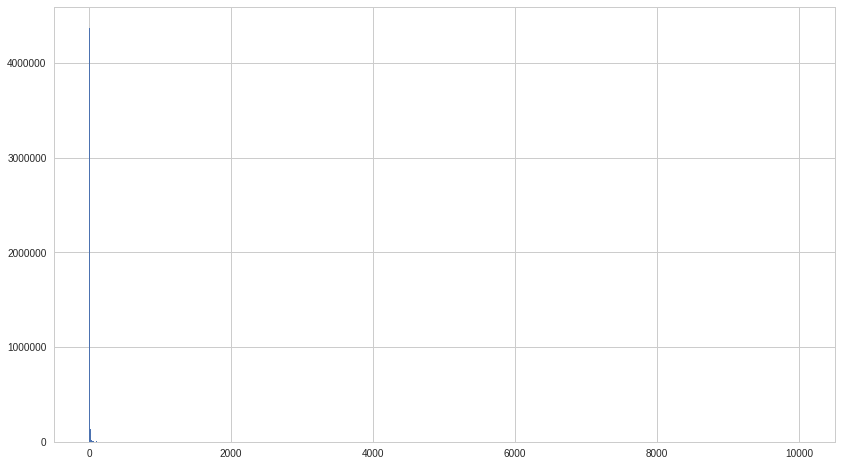

In [22]:
PB_DF['PBr'].hist(bins = 1000)

From the data info, we can see that percentile from 25% to 75% is 15 to 3.8, clearly there are outliers that will strongly affect analyses

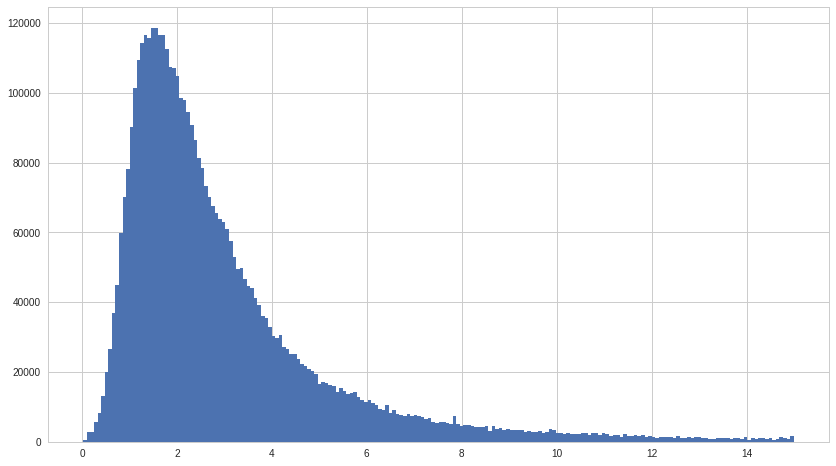

In [56]:
PB_DF['PBr'][PB_DF['PBr'].between(-1,15)].hist(bins = 200)

Looks like Chi-square distribution with degree of freedom no larger than ten, can try tested with goodness of fit.

After plotting for several times, found that data is mostly between 0 to 15 and mode is between 1 to 2.

In [7]:
PB_noOut = PB_DF[PB_DF['PBr'].between(-1,15)]

In [29]:
print((len(PB_DF)-len(PB_noOut))/(len(PB_DF)))
PB_noOut.describe()

0.03099092263920878


,Close Price,PBr,daily return
count,4.470160e+06,4.470160e+06,4.470160e+06
mean,3.682158e+01,2.972165e+00,4.901273e-04
std,1.291072e+02,2.254178e+00,2.793338e-02
min,1.470000e-01,3.050000e-02,-9.899036e-01
25%,1.785000e+01,1.514900e+00,-1.122112e-02
50%,2.908000e+01,2.293600e+00,1.639613e-04
75%,4.395000e+01,3.612700e+00,1.187447e-02
max,9.210000e+04,1.499250e+01,2.400504e+00


In [30]:
PB_DF.describe()

,Close Price,PBr,daily return
count,4.613125e+06,4.613125e+06,4.613125e+06
mean,3.694540e+01,7.329917e+00,4.892537e-04
std,1.273966e+02,9.231151e+01,2.807255e-02
min,5.900000e-02,3.050000e-02,-9.899036e-01
25%,1.778000e+01,1.537300e+00,-1.124567e-02
50%,2.908000e+01,2.353500e+00,1.507841e-04
75%,4.406000e+01,3.815300e+00,1.188750e-02
max,9.210000e+04,1.000000e+04,2.779456e+00


After removing the outliers, the mean of PB ratio is now 1.3 times the median. However, we can see that the mean of Close Price were not highly affected. Thus, I assume that the outliers of PB Ratio are caused by low book value not high price.

In [67]:
PB_group = PB_noOut.groupby("Quarter")

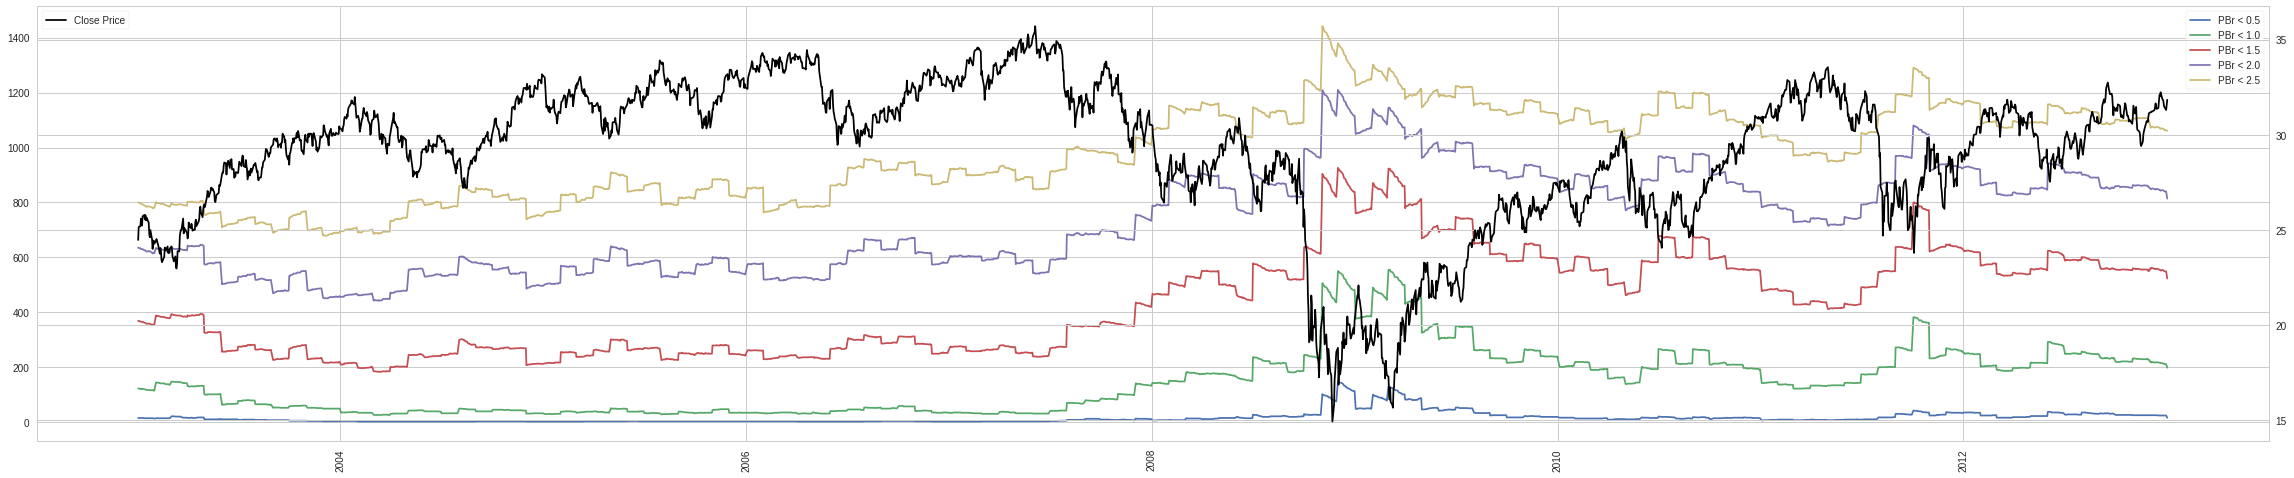

In [54]:
fig = plt.figure(figsize=(40,8))
plt.xticks(rotation=90)

ys = [PB_noOut[["Date","PBr"]][PB_noOut["PBr"]<(i/2)].groupby("Date").count() for i in range(1,6)]
x = ys[0].index

ax1 = fig.add_subplot(111)
for y in ys:
    ax1.plot(x,y)
plt.legend(["PBr < " +str(i/2) for i in range(1,6)])
ax2 = ax1.twinx()
ax2.plot(x, PB_noOut.groupby('Date').median()['Close Price'],color = 'black')
plt.legend(loc=2)

When checking the Market Price median before and after the Financial crisis, we  can see that the price in 2011-2012 has reached similar height.

Also, we can see that the shape for red, purple, and yellow line are nearly identical. Which means more informations are included in the green line.

The main issue of the plot shown above is that the number of companies in different group may vary based on the changes of the total amount of companies in the market.

Therefore, I decided to visualise the ratio of company amount in a portion verus total amount of companies in the market.

In [112]:
PB_mean = PB_group.mean()
PB_median = PB_group.median()
PB_cut = [1.0,1.5,2.3,3.8]
PB_count = PB_noOut[["Quarter","PBr"]].groupby("Quarter").count()
PB_cheap = PB_noOut[["Quarter","PBr"]][PB_noOut["PBr"]<PB_cut[0]].groupby("Quarter").count()
PB_25 = PB_noOut[["Quarter","PBr"]][PB_noOut["PBr"]<PB_cut[1]].groupby("Quarter").count()
PB_50 = PB_noOut[["Quarter","PBr"]][PB_noOut["PBr"]<PB_cut[2]].groupby("Quarter").count()
PB_75 = PB_noOut[["Quarter","PBr"]][PB_noOut["PBr"]<PB_cut[3]].groupby("Quarter").count()

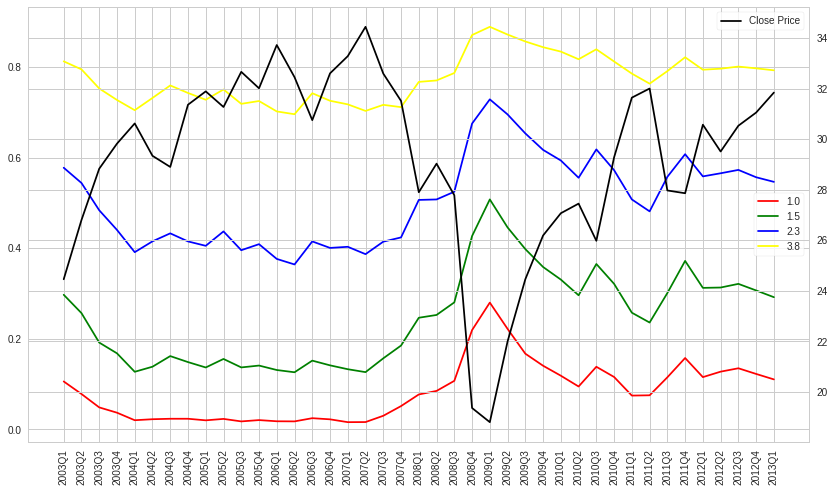

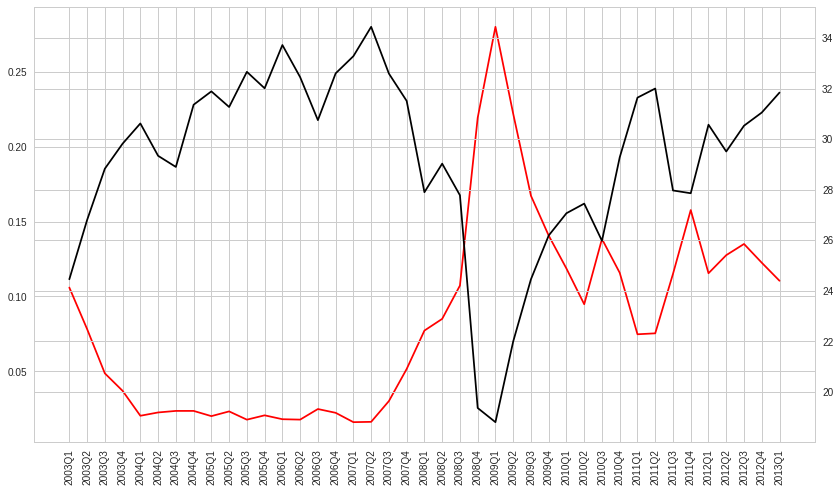

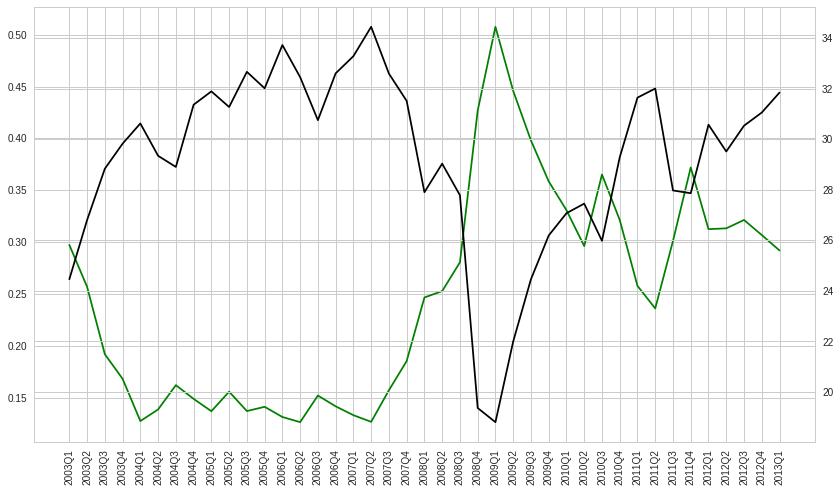

In [113]:
fig1 = plt.figure()
plt.xticks(rotation=90)
fig2 = plt.figure()
plt.xticks(rotation=90)
fig3 = plt.figure()
plt.xticks(rotation=90)
x = PB_mean.index

ax1 = fig1.add_subplot(111)

ax1.plot(x,PB_cheap/(PB_count[["PBr"]]),color = "red")
ax1.plot(x,PB_25/(PB_count[["PBr"]]),color = "green")
ax1.plot(x,PB_50/(PB_count[["PBr"]]),color = "blue")
ax1.plot(x,PB_75/(PB_count[["PBr"]]),color = "yellow")
ax1.legend([str(i) for i in PB_cut])
ax2 = ax1.twinx()
ax2.plot(x, PB_median["Close Price"],color = 'black')
ax2.legend()

ax3 = fig2.add_subplot(111)
ax3.plot(x,PB_cheap/(PB_count[["PBr"]]),color = "red")
ax4 = ax3.twinx()
ax4.plot(x, PB_median["Close Price"],color = 'black')

ax5 = fig3.add_subplot(111)
ax5.plot(x,PB_25/(PB_count[["PBr"]]),color = "green")
ax6 = ax5.twinx()
ax6.plot(x, PB_median["Close Price"],color = 'black')

From the first plot, we can see that all coloured lines are negative correlated with the market price median.

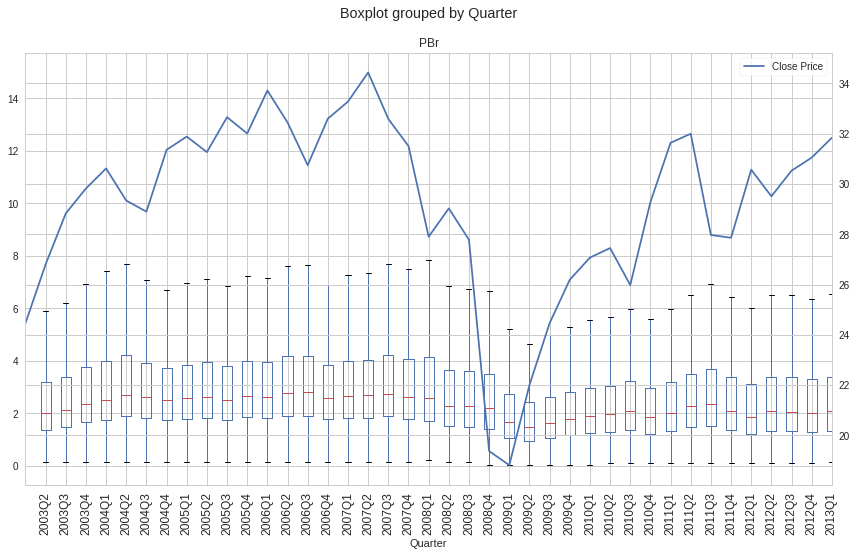

In [46]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
PB_noOut.boxplot('PBr' , 'Quarter', rot=90, ax=ax1)
ax2 = ax1.twinx()
PB_group.median()[['Close Price']].plot(legend=True,rot=90, ax=ax2)

#### Profitability Ratio, ROE

In [8]:
ROE_DF = dataDF[['Quarter', 'Date', 'SID', 'Close Price', 'ROE', 'daily return']][dataDF['ROE'].notnull()]
ROE_DF.head()

,Quarter,Date,SID,Close Price,ROE,daily return
0,2003Q1,2003-01-02 00:00:00+00:00,Equity(2 [HWM]),22.770,0.017860,0.005298
1,2003Q1,2003-01-02 00:00:00+00:00,Equity(24 [AAPL]),14.340,-0.011028,0.020641
2,2003Q1,2003-01-02 00:00:00+00:00,Equity(41 [ARCB]),25.981,0.054907,0.010934
3,2003Q1,2003-01-02 00:00:00+00:00,Equity(60 [ABS]),22.320,0.033631,-0.004016
4,2003Q1,2003-01-02 00:00:00+00:00,Equity(62 [ABT]),39.950,0.070469,0.077110


In [85]:
print((len(dataDF)-len(ROE_DF))/(len(dataDF)))
ROE_DF.describe()

0.0030777325136962866


,Close Price,ROE,daily return
count,4.627119e+06,4.627119e+06,4.627119e+06
mean,3.693377e+01,8.287041e-02,4.877218e-04
std,1.272082e+02,5.142973e+00,2.807067e-02
min,5.900000e-02,-3.600000e+01,-9.899036e-01
25%,1.779000e+01,1.197800e-02,-1.124531e-02
50%,2.908000e+01,3.072600e-02,1.481701e-04
75%,4.405000e+01,5.144200e-02,1.188547e-02
max,9.210000e+04,5.332414e+02,2.779456e+00


The mean is about 2.6 times of the median. Right skewed.

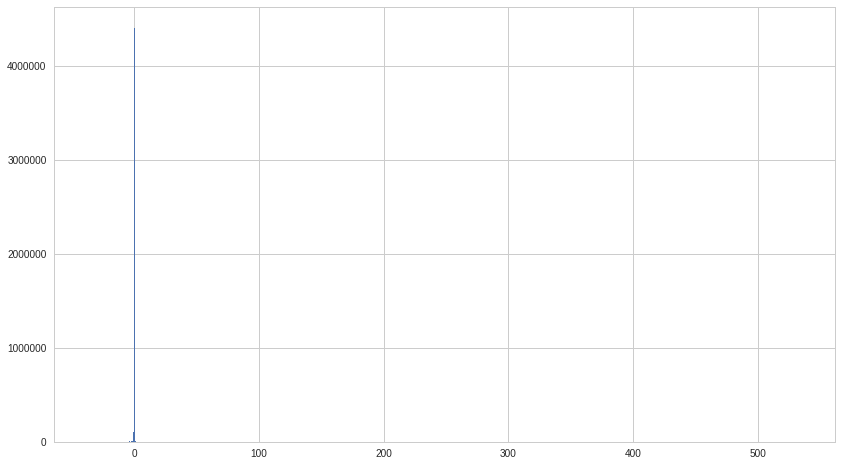

In [86]:
ROE_DF['ROE'].hist(bins = 1000)

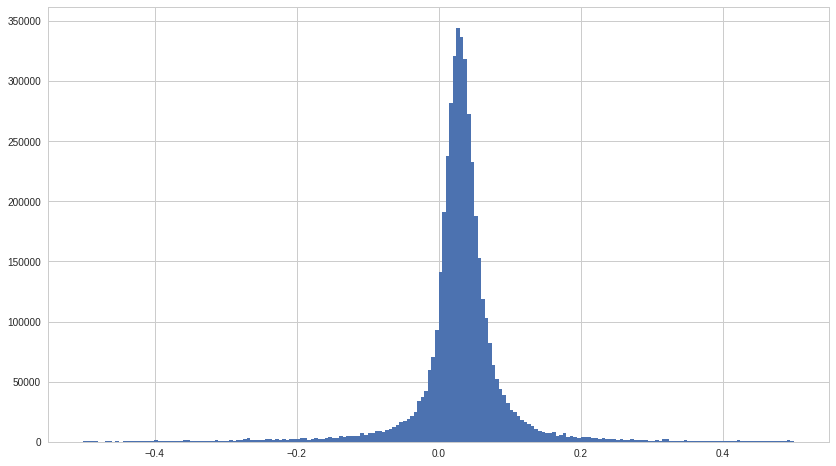

In [97]:
ROE_DF['ROE'][ROE_DF['ROE'].between(-0.5,0.5)].hist(bins = 200)

In [9]:
ROE_noOut = ROE_DF[ROE_DF['ROE'].between(-0.5,0.5)]

In [100]:
print((len(ROE_DF)-len(ROE_noOut))/(len(ROE_DF)))
ROE_noOut.describe()

0.02462720323380488


,Close Price,ROE,daily return
count,4.513166e+06,4.513166e+06,4.513166e+06
mean,3.718285e+01,3.055158e-02,4.808832e-04
std,1.286824e+02,6.961027e-02,2.784154e-02
min,3.000000e-01,-5.000000e-01,-9.899036e-01
25%,1.808000e+01,1.272700e-02,-1.119319e-02
50%,2.933000e+01,3.082300e-02,1.607976e-04
75%,4.420000e+01,5.089300e-02,1.184069e-02
max,9.210000e+04,4.994320e-01,2.400504e+00


Quite symmetry after removing the outliers.

From my understanding in finance, the numbers for ROE is too low. So I decided to have a check.

In [117]:
ROE_noOut[ROE_noOut["SID"]==24].head()

,Quarter,Date,SID,Close Price,ROE,daily return
1,2003Q1,2003-01-02 00:00:00+00:00,Equity(24 [AAPL]),14.34,-0.011028,0.020641
1332,2003Q1,2003-01-03 00:00:00+00:00,Equity(24 [AAPL]),14.81,-0.011028,0.032775
2663,2003Q1,2003-01-06 00:00:00+00:00,Equity(24 [AAPL]),14.92,-0.011028,0.007427
3993,2003Q1,2003-01-07 00:00:00+00:00,Equity(24 [AAPL]),14.89,-0.011028,-0.002011
5322,2003Q1,2003-01-08 00:00:00+00:00,Equity(24 [AAPL]),14.82,-0.011028,-0.004701


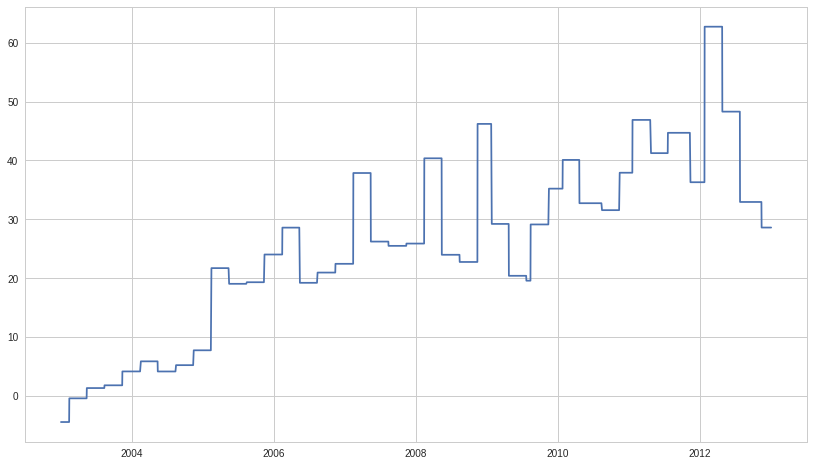

In [116]:
plt.plot(ROE_noOut[ROE_noOut["SID"]==24]["Date"],ROE_noOut[ROE_noOut["SID"]==24]["ROE"]*400)

From the data i found online about AAPL's ROE, I realized that the data provided by morningstar is quarterly data and is only for that quarlter.

What this means is that the second season net income they used had already removed the first season's net income.

Although it is not clearly shown in the AAPL's ROR, some industries and companies have seasonal returns, which is something need to be aware of.

In [102]:
ROE_group = ROE_noOut.groupby("Quarter")

In [114]:
ROE_mean = ROE_group.mean()
ROE_median = ROE_group.median()
ROE_count = ROE_noOut[["Quarter","ROE"]].groupby("Quarter").count()
ROE_cheap = ROE_noOut[["Quarter","ROE"]][ROE_noOut["ROE"]<0].groupby("Quarter").count()
ROE_25 = ROE_noOut[["Quarter","ROE"]][ROE_noOut["ROE"]<0.013].groupby("Quarter").count()

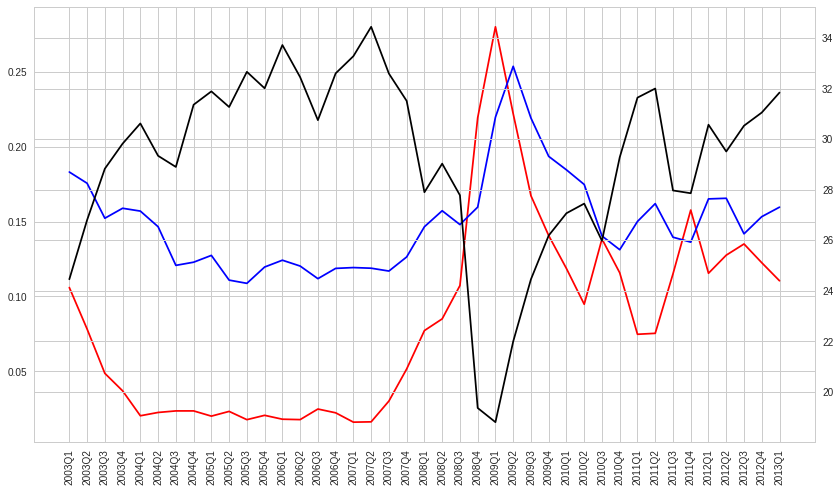

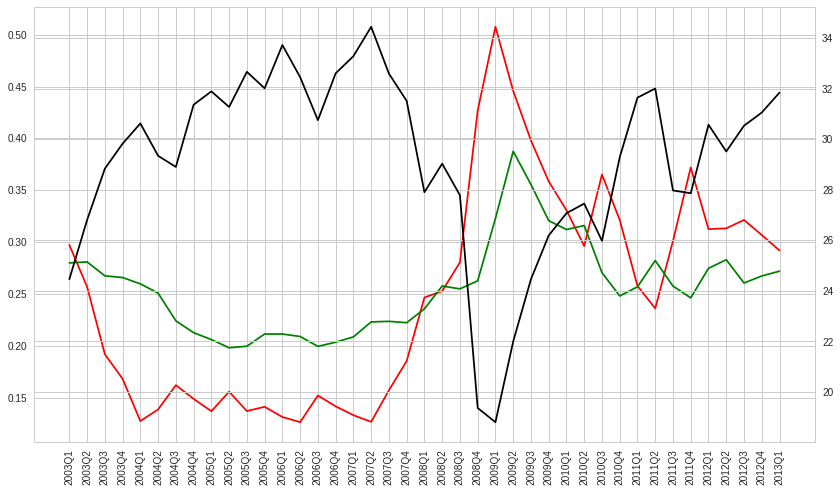

In [115]:
fig1 = plt.figure()
plt.xticks(rotation=90)
fig2 = plt.figure()
plt.xticks(rotation=90)

x = PB_mean.index

ax1 = fig1.add_subplot(111)
ax1.plot(x,PB_cheap/PB_count,color = "red")
ax1.plot(x,ROE_cheap/ROE_count,color = "blue")
ax2 = ax1.twinx()
ax2.plot(x, PB_median["Close Price"],color = 'black')

ax3 = fig2.add_subplot(111)
ax3.plot(x,PB_25/PB_count,color = "red")
ax3.plot(x,ROE_25/ROE_count,color = "green")
ax4 = ax3.twinx()
ax4.plot(x, PB_median["Close Price"],color = 'black')

Tested my assumption, I assume no matter in what timing, there will still be a group of companies that aren't performing well. As shown above, the amount of companies with low PB ratio to less compare to the amount of companies with low ROE.

In [12]:
PB_noOut['log return'] = np.log(PB_noOut['daily return']+1)
PB_noOut.head()

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Quarter,Date,SID,Close Price,PBr,daily return,log return
0,2003Q1,2003-01-02 00:00:00+00:00,Equity(2 [HWM]),22.770,1.9482,0.005298,0.005284
1,2003Q1,2003-01-02 00:00:00+00:00,Equity(24 [AAPL]),14.340,1.2503,0.020641,0.020430
2,2003Q1,2003-01-02 00:00:00+00:00,Equity(41 [ARCB]),25.981,1.8119,0.010934,0.010875
3,2003Q1,2003-01-02 00:00:00+00:00,Equity(60 [ABS]),22.320,1.5249,-0.004016,-0.004024
4,2003Q1,2003-01-02 00:00:00+00:00,Equity(62 [ABT]),39.950,5.8893,0.077110,0.074281


In [13]:
PB_cut = [PB_noOut['PBr'].quantile(i/10.0) for i in range(11)]
for i in range(10):
    PB_noOut['PB_'+str(i*10)+"~"+str(i*10+10)] = np.nan
    PB_noOut['PB_'+str(i*10)+"~"+str(i*10+10)]= PB_noOut['log return'][PB_noOut['PBr'].between(PB_cut[i],PB_cut[i+1])]

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [126]:
PB_noOut.head()

,Quarter,Date,SID,Close Price,PBr,daily return,log return,PB_0~10,PB_10~20,PB_20~30,PB_30~40,PB_40~50,PB_50~60,PB_60~70,PB_70~80,PB_80~90,PB_90~100
0,2003Q1,2003-01-02 00:00:00+00:00,Equity(2 [HWM]),22.770,1.9482,0.005298,0.005284,NaN,NaN,NaN,0.005284,NaN,NaN,NaN,NaN,NaN,NaN
1,2003Q1,2003-01-02 00:00:00+00:00,Equity(24 [AAPL]),14.340,1.2503,0.020641,0.020430,NaN,0.02043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003Q1,2003-01-02 00:00:00+00:00,Equity(41 [ARCB]),25.981,1.8119,0.010934,0.010875,NaN,NaN,NaN,0.010875,NaN,NaN,NaN,NaN,NaN,NaN
3,2003Q1,2003-01-02 00:00:00+00:00,Equity(60 [ABS]),22.320,1.5249,-0.004016,-0.004024,NaN,NaN,-0.004024,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003Q1,2003-01-02 00:00:00+00:00,Equity(62 [ABT]),39.950,5.8893,0.077110,0.074281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.074281


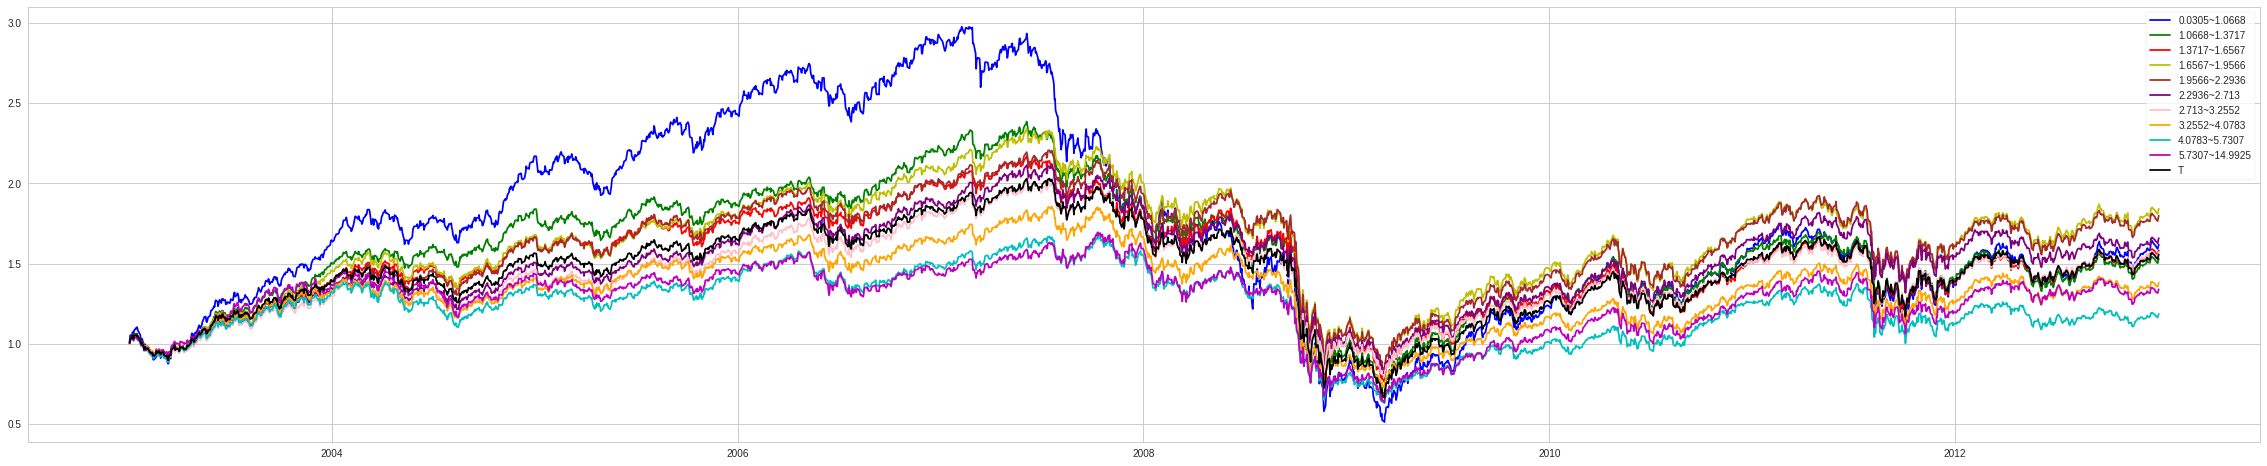

In [14]:
plt.figure(figsize=(40,8))
PB_Dategroup = PB_noOut.groupby('Date')
PB_Date_mean = PB_Dategroup.mean()
color_list = ['b','g','r','y','brown','purple','pink','orange','c','m']
x = PB_Date_mean.index
for i in range(10):
    print(plt.plot(x,np.exp(PB_Date_mean['PB_'+str(i*10)+"~"+str(i*10+10)].cumsum()), color=color_list[i]))
print(plt.plot(x,np.exp(PB_Date_mean['log return'].cumsum()), color='black'))

legend = [str(PB_cut[i])+"~"+str(PB_cut[i+1]) for i in range(10)]
legend.append("T")
plt.legend(legend)


In [10]:
ROE_noOut['log return'] = np.log(ROE_noOut['daily return']+1)
ROE_cut = [ROE_noOut['ROE'].quantile(i/10.0) for i in range(11)]
for i in range(10):
    ROE_noOut['ROE_'+str(i*10)+"~"+str(i*10+10)] = np.nan
    ROE_noOut['ROE_'+str(i*10)+"~"+str(i*10+10)]= ROE_noOut['log return'][ROE_noOut['ROE'].between(ROE_cut[i],ROE_cut[i+1])]

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

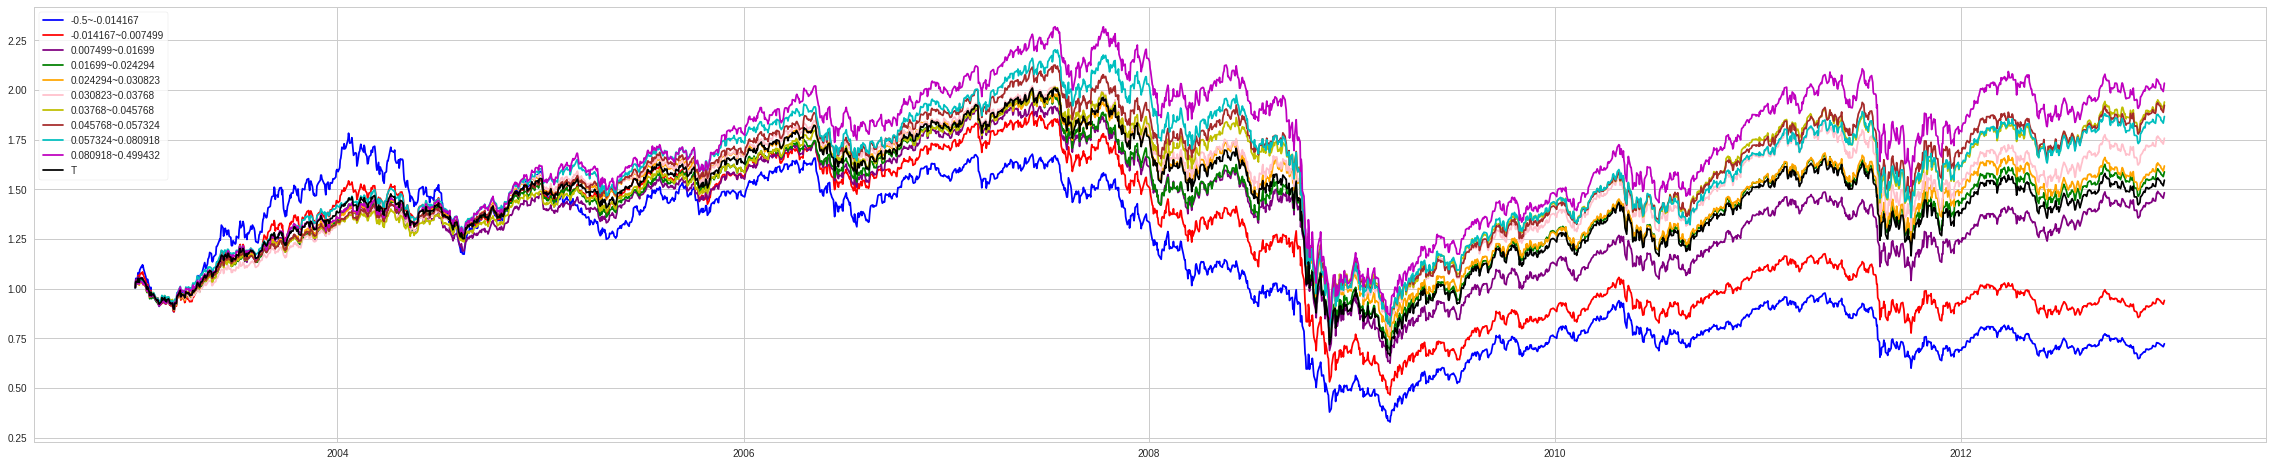

In [11]:
plt.figure(figsize=(40,8))
ROE_Dategroup = ROE_noOut.groupby('Date')
ROE_Date_mean = ROE_Dategroup.mean()
color_list = ['b','r','purple','g','orange','pink','y','brown','c','m']
x = ROE_Date_mean.index
for i in range(10):
    print(plt.plot(x,np.exp(ROE_Date_mean['ROE_'+str(i*10)+"~"+str(i*10+10)].cumsum()), color=color_list[i]))
print(plt.plot(x,np.exp(ROE_Date_mean['log return'].cumsum()), color='black'))

legend = [str(ROE_cut[i])+"~"+str(ROE_cut[i+1]) for i in range(10)]
legend.append("T")
plt.legend(legend)

Although the blue line and red did reach high in 2004, both of them performed poorly in long term.

Instead of saying choose good stocks using ROE, it works better on avoiding bad stocks.

#### Profitability Ratio, Cash Return

In [15]:
CR_DF = dataDF[['Quarter', 'Date', 'SID', 'Close Price', 'Cash Return', 'daily return']][dataDF['Cash Return'].notnull()]

In [16]:
CR_DF.describe()

,Close Price,Cash Return,daily return
count,4.418160e+06,4.418160e+06,4.418160e+06
mean,3.500746e+01,2.839980e-02,4.891668e-04
std,4.018054e+01,5.662271e-01,2.810682e-02
min,5.900000e-02,-1.842870e+01,-9.899036e-01
25%,1.758000e+01,-6.000000e-04,-1.137800e-02
50%,2.876000e+01,3.370000e-02,1.292324e-04
75%,4.361000e+01,6.250000e-02,1.201684e-02
max,2.659680e+03,2.086866e+02,2.779456e+00


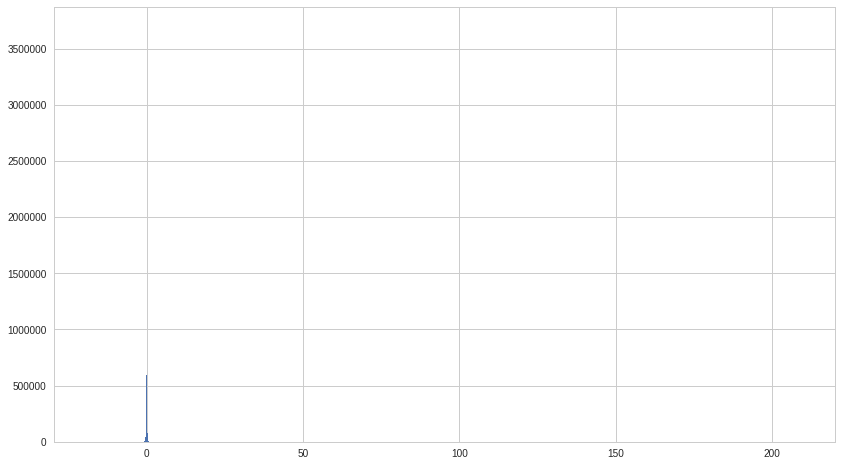

In [17]:
CR_DF['Cash Return'].hist(bins = 1000)

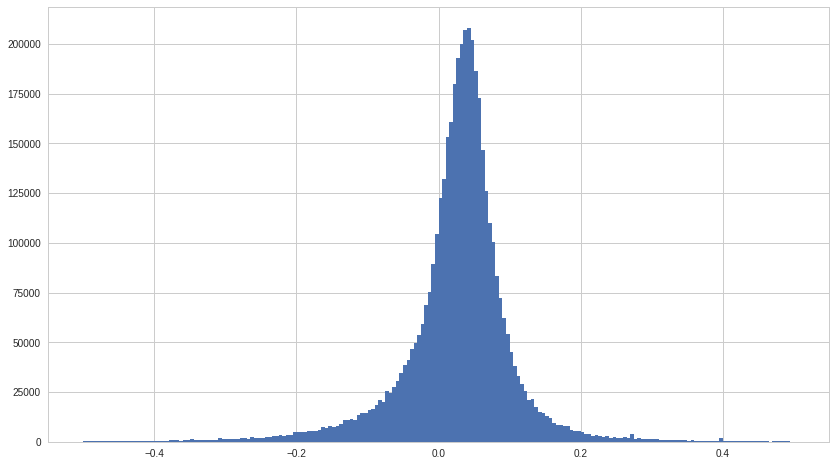

In [19]:
CR_DF['Cash Return'][CR_DF['Cash Return'].between(-0.5,0.5)].hist(bins = 200)

In [20]:
CR_noOut = CR_DF[CR_DF['Cash Return'].between(-0.5,0.5)]
CR_noOut.describe()

,Close Price,Cash Return,daily return
count,4.396363e+06,4.396363e+06,4.396363e+06
mean,3.508871e+01,2.663613e-02,4.865468e-04
std,4.024301e+01,7.984827e-02,2.802436e-02
min,5.900000e-02,-4.998000e-01,-9.899036e-01
25%,1.765000e+01,-3.000000e-04,-1.136364e-02
50%,2.884000e+01,3.380000e-02,1.298364e-04
75%,4.369000e+01,6.240000e-02,1.200000e-02
max,2.659680e+03,4.999000e-01,2.779456e+00


In [21]:
CR_noOut['log return'] = np.log(CR_noOut['daily return']+1)
CR_cut = [CR_noOut['Cash Return'].quantile(i/10.0) for i in range(11)]
for i in range(10):
    CR_noOut['CR_'+str(i*10)+"~"+str(i*10+10)] = np.nan
    CR_noOut['CR_'+str(i*10)+"~"+str(i*10+10)]= CR_noOut['log return'][CR_noOut['Cash Return'].between(CR_cut[i],CR_cut[i+1])]

/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/venvs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

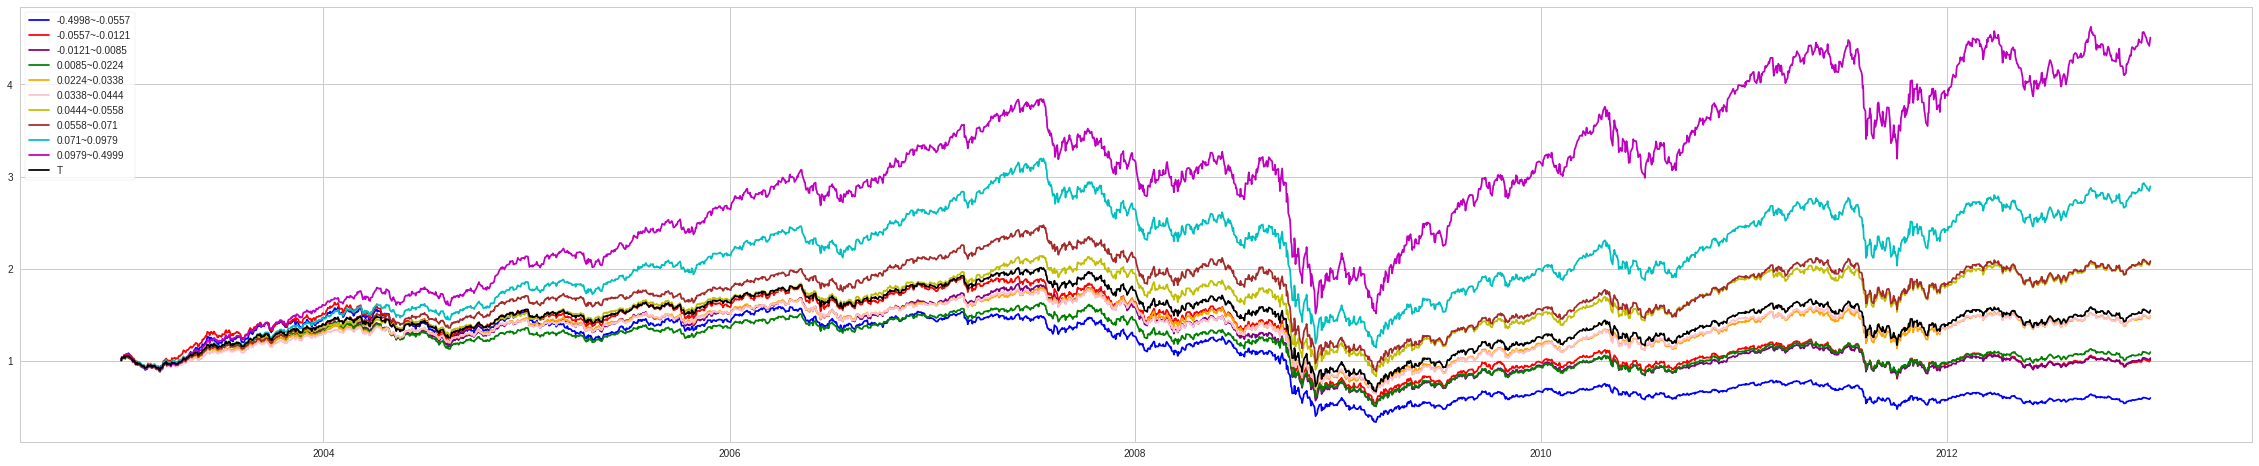

In [22]:
plt.figure(figsize=(40,8))
CR_Dategroup = CR_noOut.groupby('Date')
CR_Date_mean = CR_Dategroup.mean()
color_list = ['b','r','purple','g','orange','pink','y','brown','c','m']
x = CR_Date_mean.index
for i in range(10):
    print(plt.plot(x,np.exp(CR_Date_mean['CR_'+str(i*10)+"~"+str(i*10+10)].cumsum()), color=color_list[i]))
print(plt.plot(x,np.exp(CR_Date_mean['log return'].cumsum()), color='black'))

legend = [str(CR_cut[i])+"~"+str(CR_cut[i+1]) for i in range(10)]
legend.append("T")
plt.legend(legend)

The performance of the cash return >0.1 is outstanding.

The market performed close to the meium group.

The order of each group is clearer compare to PB ration and ROE.

## Future analyses

Test whether stock return belongs to normal distribution. (With Goodness of Fit and qqplot)

More exploratory exploratory data analysis can be done.

Do some feature engineering.

Plan to seperate returns into groups and apply classification models.

Result will be backtested on future data (2013 to 2020)